# Regressão Linear usando Minimos Quadrados

Valores de entalpia por unidade de massa h de um plasma de Argônio em equilibrio (ions $Ar,\ Ar^{+},\ A^{++},\ A^{+++} e\ elétrons$ versus temperatura são:

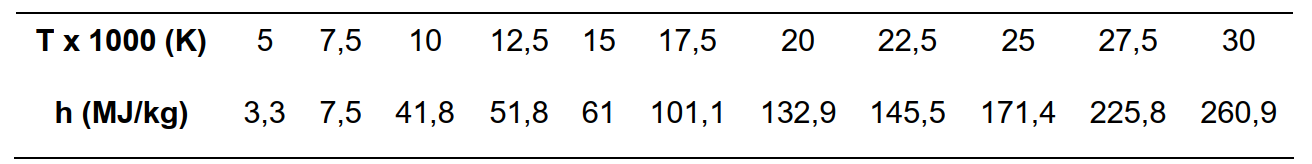

a) Utilize a regressão linear pelo método dos mínimos quadrados para ajustar os dados obtendo a inclinação e a intersecção com o eixo y.

b) Calcule os erros absolutos, o erros percentuais, o desvio padrão em torno da média e o erro padrão da estimativa

c) Elabore um gráfico de h contra T com os dados da tabela e a reta aproximada.

A =  [[1.10000e+01 1.92500e+05]
 [1.92500e+05 4.05625e+09]]
b =  [1203.0, 28075750.0]
coef =  [-6.94100000e+01  1.02156364e-02]


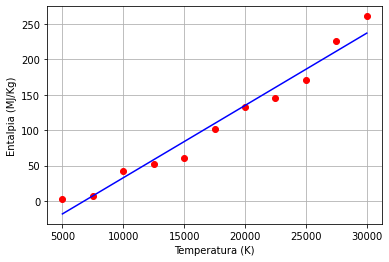

In [ ]:
#LETRA A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#dim é o grau do polinômio que desejamos! Ou seja, quantos coeficientes queremos calcular
def sistemaAumentado(x,y,dim): #Primeiramente queremos obter um sistema aumentado em função de x e y fornecidos
  m = len(x) #número de dados que temos
  A = np.empty((dim,dim)) #matriz vazia como dimensão do nosso polinômio
  b = np.empty((dim)) #é dado pela dimensão de A.
  soma = [] 
  for i in range(0,dim+2): #fazer o cálculo de 4 termos (como nossa dim é 2)
    aux = 0 #variável de acúmulo
    for k in range(0,m): #para cada termo, fazer a soma dos k pontos
      aux = aux + x[k]**i #definindo os termos de cada linha i e coluna j da matriz, que são utilizados posteriormente
    soma.append(aux)

  for i in range(0,dim): #linha
    for j in range(i,dim): #coluna/ #vamos construir apenas a matriz para o sistema triangular superior, visto que nossa matriz é simétrica
      A[i,j] = soma[i+j]
      if (i != j): #como a matriz é simétrica, os dados da matriz triangular superior são iguais aos da matriz triangular inferior
        A[j,i] = A[i,j]
  
  b = [] #vamos agora constituir o vetor b
  for i in range(0,dim): #vamos passar entre toda a dimensão da matriz para constituir o b
    aux = 0
    for k in range(0,m):
      aux = aux + y[k]*(x[k]**(i)) #aqui realiza-se uma somatória para os n valores da matriz x fornecida
    b.append(aux)
  
  return A,b #matrizes de apoio - método utilizado: A*alfa = b onde alfa é a nossa matriz dos coeficientes
      
a = np.array([5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30]) # Acho que tem que dividir por 1000 ()
x = a*1000
y = np.array([3.3,7.5,41.8,51.8,61,101.1,132.9,145.5,171.4,225.8,260.9])

A,b = sistemaAumentado(x,y,2)
print("A = ", A)
print("b = ", b)
coef = np.linalg.solve(A,b)
print("coef = ",coef)

#LETRA C

plt.plot(x,y,'ro')
data = np.linspace(min(x),max(x), 100) #Gera 100 pontos, começando primeiro valor de x e indo até o final do valor de x.
c = coef[::-1].copy() # Fazer uma cópia 
p = np.poly1d(c)
plt.plot(data,p(data),'b-')
plt.grid()
plt.xlabel("Temperatura (K)")
plt.ylabel("Entalpia (MJ/Kg)")
plt.show()

In [ ]:
#LETRA B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.array([5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30])
x=a*1000
y1 = np.array([3.3,7.5,41.8,51.8,61,101.1,132.9,145.5,171.4,225.8,260.9])
coef =  [-69.41, 10.21563636]

y2 = []
for i in x:
  yestimado = -6.94100000e+01 + (1.02156364e-02)*i
  y2.append(yestimado)
print(y2)
#aqui nesse caso fizemos y2 ser igual ao yestimado. Após printar, obtivemos o resultado abaixo:
yestimado = [-18.3318182, 7.207272700000004, 32.746363599999995, 58.2854545, 83.8245454, 109.3636363, 134.9027272, 160.4418181, 185.980909, 211.5199999, 237.0590908]

#com os valores de x, y1 e yestimado, faremos as contas a seguir:
#erro absoluto
erro_absoluto = np.abs(y1 - yestimado)
print()
#erro percentual
erro_percentual = (erro_absoluto/y1)*100
tabela1 = pd.DataFrame([erro_absoluto,erro_percentual])
tabela1 = tabela1.transpose()
tabela1 = tabela1.rename(columns={0:"Erro Absoluto",1:"Erro Percentual"})
print(tabela1)
print()
#desvio padrão em torno da média

media = np.sum(yestimado)/len(yestimado)
x = yestimado - media
soma = np.sum(x**2)
desvio_padrao_media = np.sqrt(soma/(len(yestimado)-1))
print('O desvio padrão em torno da média é:',desvio_padrao_media)
print()

#erro padrão da estimativa
p = y1 - yestimado
soma = np.sum(p**2)
erro_padrao_estimativa = np.sqrt(soma/(len(p)-2))
print('O erro padrão da estimativa é:',erro_padrao_estimativa)


[-18.331818, 7.207273000000001, 32.746364, 58.28545500000001, 83.824546, 109.36363700000001, 134.902728, 160.441819, 185.98091000000002, 211.520001, 237.059092]

    Erro Absoluto  Erro Percentual
0       21.631818       655.509642
1        0.292727         3.903031
2        9.053636        21.659417
3        6.485455        12.520182
4       22.824545        37.417288
5        8.263636         8.173725
6        2.002727         1.506943
7       14.941818        10.269291
8       14.580909         8.506948
9       14.280000         6.324181
10      23.840909         9.137949

O desvio padrão em torno da média é: 84.70358200208001

O erro padrão da estimativa é: 16.30772606137745
